# Covid-19 Lab

Quanto os leitos destinados para Covid-19 representam do total de leitos de grande SP? Como está essa evolução?

- Fontes de dados
    - https://github.com/seade-R/dados-covid-sp
    - https://www.seade.gov.br/coronavirus/
    - https://www.redesocialdecidades.org.br/br/SP/sao-paulo/leitos-hospitalares
    - http://www.scielo.br/scielo.php?script=sci_arttext&pid=S0103-73312020000300316


- Links importantes
    - https://www.saopaulo.sp.gov.br/planosp/simi/leitos/
    - https://www.cnnbrasil.com.br/saude/2021/03/19/dados-mostram-que-covid-19-ja-e-a-doenca-que-mais-matou-no-brasil-em-2021
    - https://www.cnnbrasil.com.br/saude/2021/03/18/sp-supera-90-de-ocupacao-em-leitos-de-uti-16-estados-e-o-df-estao-em-colapso

In [180]:
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = 'data/'

In [181]:
file_name = 'plano_sp_leitos_internacoes_serie_nova_variacao_semanal_2.csv'
leitos_internacoes = 'Leitos-e-Internacoes.csv'

## Dados sobre os casos de internações no estado de SP

In [182]:
df = pd.read_csv(DATA_PATH + file_name, sep=';', decimal=',')

In [183]:
df.head()

,datahora,nome_drs,pacientes_uti_mm7d,total_covid_uti_mm7d,ocupacao_leitos,pop,leitos_pc,internacoes_7d,internacoes_7d_l,internacoes_7v7,pacientes_uti_ultimo_dia,total_covid_uti_ultimo_dia,ocupacao_leitos_ultimo_dia,internacoes_ultimo_dia,pacientes_enf_mm7d,total_covid_enf_mm7d,pacientes_enf_ultimo_dia,total_covid_enf_ultimo_dia
0,2020-10-08,DRS 01 Grande São Paulo,2036.86,4829.86,42.17,21138247,22.85,4121,4093,0.68,2011,4798,41.91,658,2533.86,7104.86,2555,7010
1,2020-10-08,DRS 02 Araçatuba,58.71,118.57,49.52,764041,15.52,126,131,-3.82,59,120,49.17,22,94.71,302.43,99,302
2,2020-10-08,DRS 03 Araraquara,45.14,123.29,36.61,991435,12.44,248,222,11.71,49,123,39.84,39,125.86,388.86,141,408
3,2020-10-08,DRS 04 Baixada Santista,108.14,409.14,26.43,1831884,22.33,205,189,8.47,110,412,26.70,31,165.00,690.29,180,691
4,2020-10-08,DRS 05 Barretos,55.57,91.86,60.49,425090,21.61,192,150,28.00,58,91,63.74,27,54.43,243.14,49,248


In [184]:
df.columns

Index(['datahora', 'nome_drs', 'pacientes_uti_mm7d', 'total_covid_uti_mm7d',
       'ocupacao_leitos', 'pop', 'leitos_pc', 'internacoes_7d',
       'internacoes_7d_l', 'internacoes_7v7', 'pacientes_uti_ultimo_dia',
       'total_covid_uti_ultimo_dia', 'ocupacao_leitos_ultimo_dia',
       'internacoes_ultimo_dia', 'pacientes_enf_mm7d', 'total_covid_enf_mm7d',
       'pacientes_enf_ultimo_dia', 'total_covid_enf_ultimo_dia'],
      dtype='object')

## Gráficos mostrando ocupação de leitos destinados a Covid-19 e internações totais

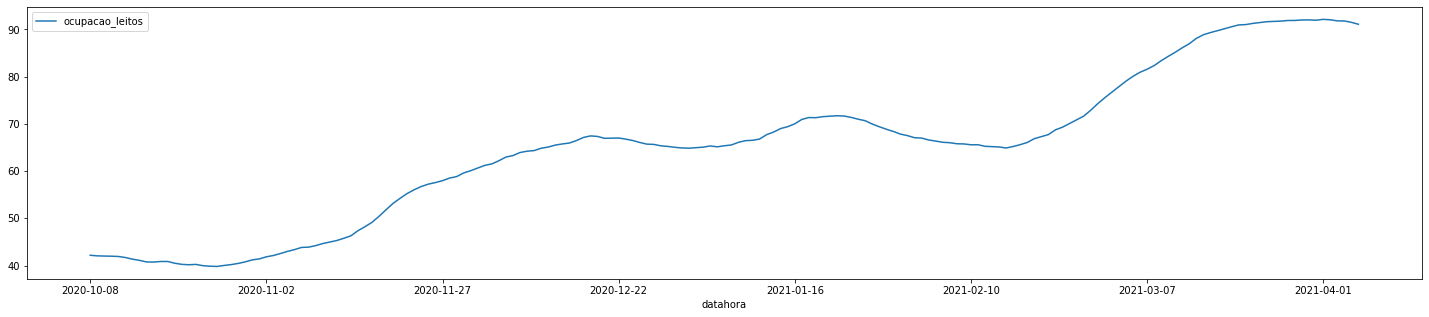

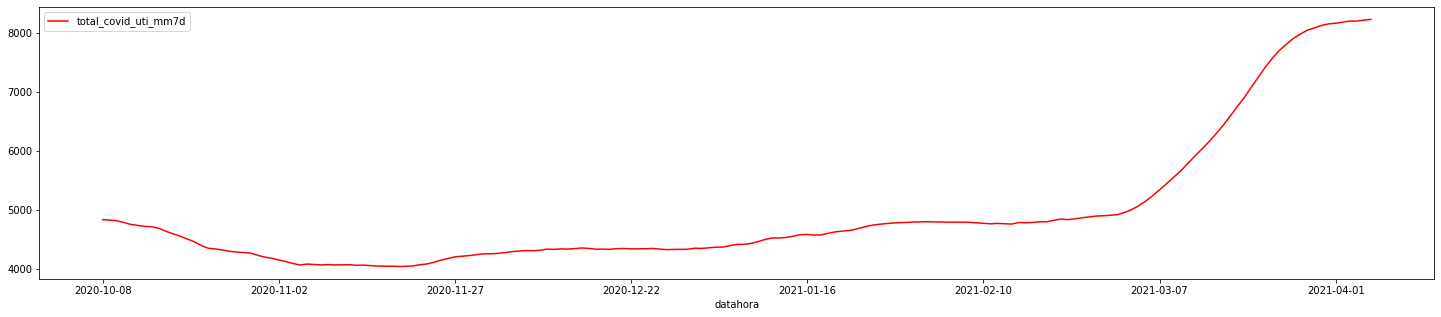

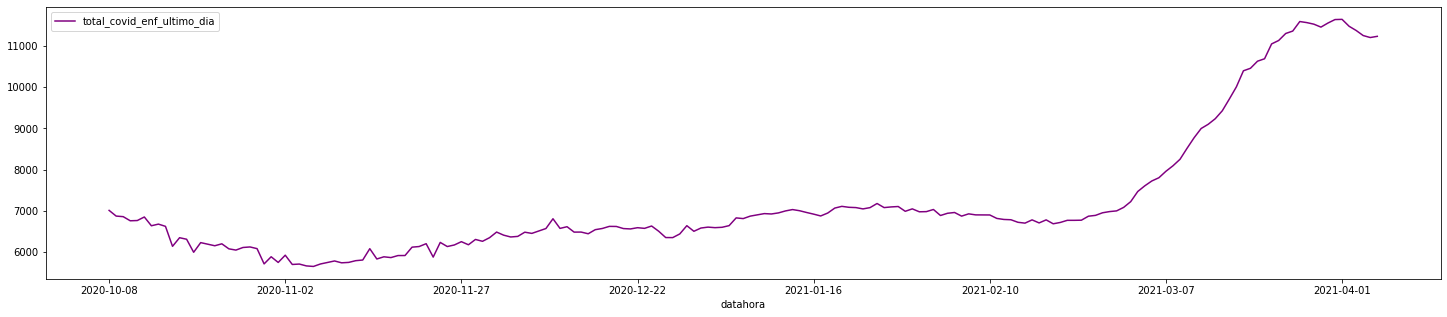

In [185]:
plt.rcParams['figure.figsize'] = [25, 5]

grande_saopaulo = df.loc[df['nome_drs'] == 'DRS 01 Grande São Paulo']

# gca stands for 'get current axis'
#ax = plt.gca()

grande_saopaulo.plot(kind='line',x='datahora',y='ocupacao_leitos')
grande_saopaulo.plot(kind='line',x='datahora',y='total_covid_uti_mm7d', color='red')
grande_saopaulo.plot(kind='line',x='datahora',y='total_covid_enf_ultimo_dia', color='purple')
#df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()

## Dados de leitos totais no estado

In [186]:
variaveis_sp = 'pt-brvariaveis.rede-brasileira_br_sp_sao-paulo_leitos-hospitalares.csv'
df_variaveis = pd.read_csv(DATA_PATH + variaveis_sp, sep=',', decimal=',')

In [187]:
df_variaveis.tail()

,ID da cidade,Nome da cidade,ID,Tipo,Apelido,Período de atualização,É Básica?,Unidade de medida,Nome,Data,Valor,Observações,Fonte preenchida,Nome Região,Valor ativo?,Gerado por computador?,ID da Região,Nível da Região
26,1,São Paulo,58,Inteiro,numero_total_de_leitos_hospitalares,anual,não,NaN,Número total de leitos hospitalares,01/01/2014,34269,NaN,SMS (Secretaria Municipal da Saúde)/SES (Secre...,NaN,não,não,NaN,NaN
27,1,São Paulo,58,Inteiro,numero_total_de_leitos_hospitalares,anual,não,NaN,Número total de leitos hospitalares,01/01/2015,34639,NaN,CNES (Cadastro Nacional dos Estabelecimentos d...,NaN,não,não,NaN,NaN
28,1,São Paulo,58,Inteiro,numero_total_de_leitos_hospitalares,anual,não,NaN,Número total de leitos hospitalares,01/01/2016,33526,Elaboração: SMUL/Deinfo,CNES (Cadastro Nacional dos Estabelecimentos d...,NaN,não,não,NaN,NaN
29,1,São Paulo,58,Inteiro,numero_total_de_leitos_hospitalares,anual,não,NaN,Número total de leitos hospitalares,01/01/2017,34458,NaN,SMS (Secretaria Municipal da Saúde)/SES (Secre...,NaN,não,não,NaN,NaN
30,1,São Paulo,58,Inteiro,numero_total_de_leitos_hospitalares,anual,não,NaN,Número total de leitos hospitalares,01/01/2018,29018,Elaboração: Rede Nossa São Paulo,SMS (Secretaria Municipal da Saúde)/SES (Secre...,NaN,não,não,NaN,NaN


In [188]:
df_variaveis['Nome da cidade'].unique()

array(['São Paulo'], dtype=object)

In [189]:
df_variaveis.columns

Index(['ID da cidade', 'Nome da cidade', 'ID', 'Tipo', 'Apelido',
       'Período de atualização', 'É Básica?', 'Unidade de medida', 'Nome',
       'Data', 'Valor', 'Observações', 'Fonte preenchida', 'Nome Região',
       'Valor ativo?', 'Gerado por computador?', 'ID da Região',
       'Nível da Região'],
      dtype='object')

In [190]:
df_leitos = df_variaveis.loc[df_variaveis['Apelido'] == 'numero_total_de_leitos_hospitalares']

## Estimando o número de leitos na grande São Paulo

Estimativa simples da quantidade de leitos totais disponíveis na grande São Paulo. Aqui não temos a variação por criação de novos leitos por iniciativas governamentais e/ou privadas.

In [191]:
total_leitos_abril_2020 = 31292 # COTRIM JUNIOR, Dorival Fagundes  and  CABRAL, Lucas Manoel da Silva. Crescimento dos leitos de UTI no país durante a pandemia de Covid-19: desigualdades entre o público x privado e iniquidades regionais. Physis [online]. 2020, vol.30, n.3 [cited  2021-04-05], e300317. Available from: <http://www.scielo.br/scielo.php?script=sci_arttext&pid=S0103-73312020000300316&lng=en&nrm=iso>.  Epub Sep 18, 2020. ISSN 1809-4481.  https://doi.org/10.1590/s0103-73312020300317.
pop = 88371433
leitos_por_mil_hab = total_leitos_abril_2020 / pop * 1000

pop_grande_sp = 44000000
max_leitos = pop_grande_sp / 1000 * leitos_por_mil_hab

print(max_leitos)

15580.23846914421


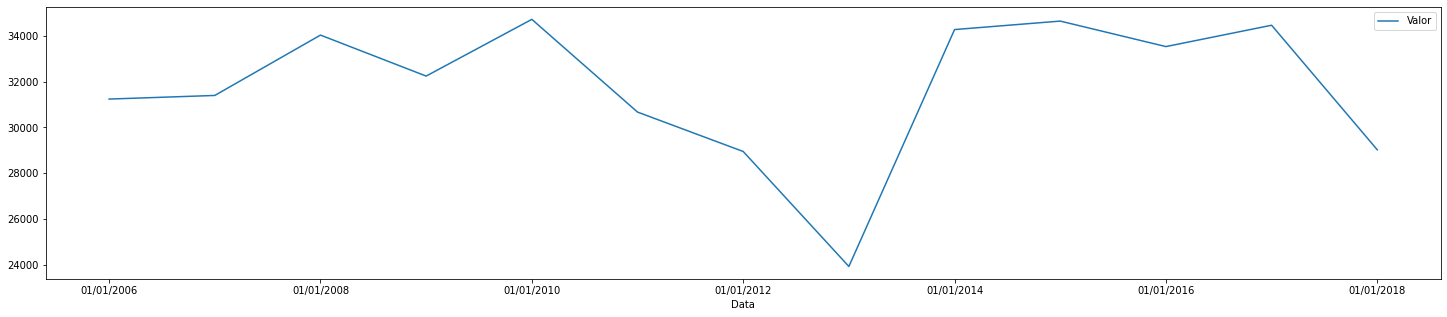

In [192]:
df_leitos.plot(kind='line',x='Data',y='Valor')

plt.show()

## Leitos Covid-19 vs leitos totais em SP

Considerando a variável "numero_total_de_leitos_hospitalares", temos como fazer uma verificação simples de quantidade de leitos atribuídos para covid-19 vs o número total.

In [193]:
grande_saopaulo = df.loc[df['nome_drs'] == 'DRS 01 Grande São Paulo'].copy()
grande_saopaulo['leitos_covid_19'] = grande_saopaulo['total_covid_uti_mm7d'] + 0 #grande_saopaulo['total_covid_enf_ultimo_dia']

leitos_covid = grande_saopaulo[['datahora', 'leitos_covid_19', 'ocupacao_leitos']].copy()
leitos_covid['max_leitos_geral'] = max_leitos # constante para todas as rows
leitos_covid['oferta_covid19_leitos_geral'] = leitos_covid['leitos_covid_19'] / leitos_covid['max_leitos_geral'] * 100
leitos_covid['leitos_total_ocupados'] = (leitos_covid['ocupacao_leitos'] / 100) * leitos_covid['leitos_covid_19']
leitos_covid['ocupacao_relativa'] = leitos_covid['ocupacao_leitos'] / 100 * leitos_covid['oferta_covid19_leitos_geral']

In [194]:
leitos_covid.tail()

,datahora,leitos_covid_19,ocupacao_leitos,max_leitos_geral,oferta_covid19_leitos_geral,leitos_total_ocupados,ocupacao_relativa
3168,2021-04-02,8178.71,92.05,15580.238469,52.494126,7528.502555,48.320843
3186,2021-04-03,8197.14,91.82,15580.238469,52.612417,7526.613948,48.308721
3204,2021-04-04,8197.29,91.80,15580.238469,52.613380,7525.112220,48.299082
3222,2021-04-05,8213.43,91.51,15580.238469,52.716972,7516.109793,48.241301
3240,2021-04-06,8226.57,91.10,15580.238469,52.801310,7494.405270,48.101993


## Oferta de leitos para Covid-19 vs Ocupação

Abaixo temos a porcentagem referente aos leitos totais da grande São Paulo destinados a Covid-19 e sua ocupação no tempo

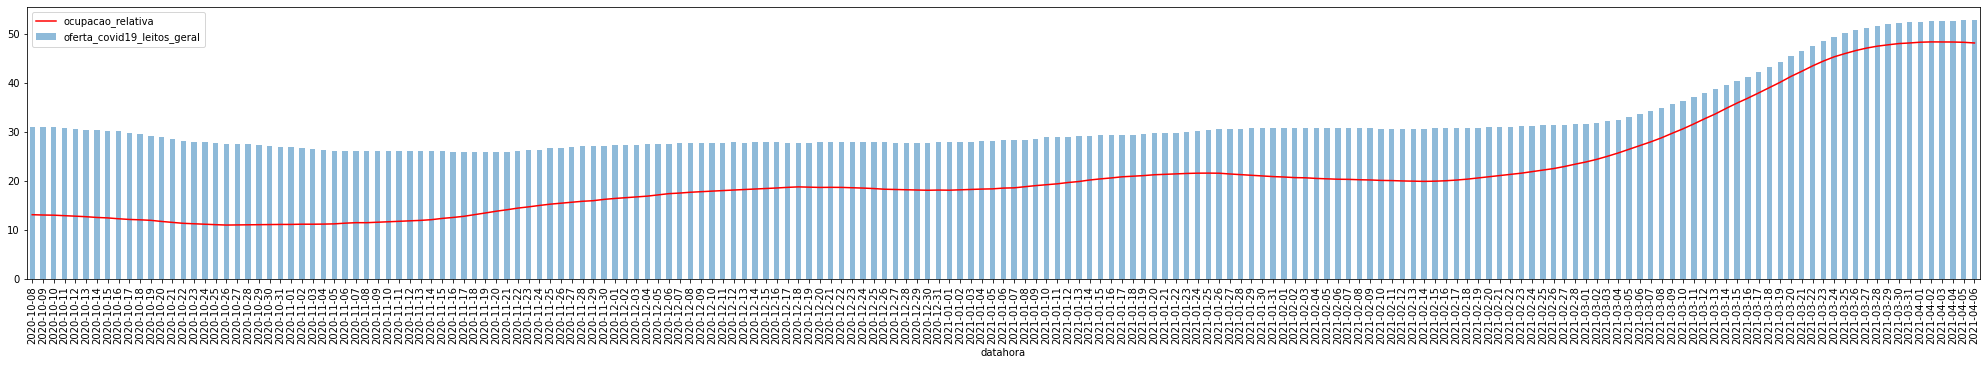

In [195]:
plt.rcParams['figure.figsize'] = [35, 5]
ax = plt.gca()

leitos_covid.plot(kind='line',x='datahora',y='ocupacao_relativa', color='red', ax = ax)
leitos_covid.plot(kind='bar',x='datahora',y='oferta_covid19_leitos_geral', ax = ax, alpha=0.5)

plt.xticks(rotation=90)
plt.show()